# READING THE DATASET

In [2]:
import pandas as pd
a=pd.read_csv('D:coding stuff/coding dataset files/tips.csv')

In [3]:
a

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# GETTING BASIC DETAILS ABOUT DATAFRAMES

In [4]:
a.shape

(244, 7)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
a.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
a.duplicated().sum()

1

In [8]:
a.query("total_bill==16.99 and tip==1.01 and size == 2")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [9]:
a.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
b=a.drop_duplicates()

In [11]:
b.duplicated().sum()

0

# DESCRIPTIVE ANALYTICS

### SEPERATING CAT AND CON FEATURES

In [12]:
a.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
a.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [14]:
cat=list(a.columns[a.dtypes=='object'])

In [15]:
cat

['sex', 'smoker', 'day', 'time']

In [16]:
con=list(a.columns[a.dtypes!='object'])

In [17]:
con

['total_bill', 'tip', 'size']

### USING DESCRIBE FUNTION ON CONTINOUS (con) FEATURES

In [18]:
a[con].describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [19]:
a[cat].describe().T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


# DATA VISUALIZATION

1) Univariate analysis

2) Bivariate analysis

3) Multivariate analysis

# UNIVARIATE ANALYSIS

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

### COUNTPLOT FOR CATEGORICAL  FEATURES

In [21]:
a['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

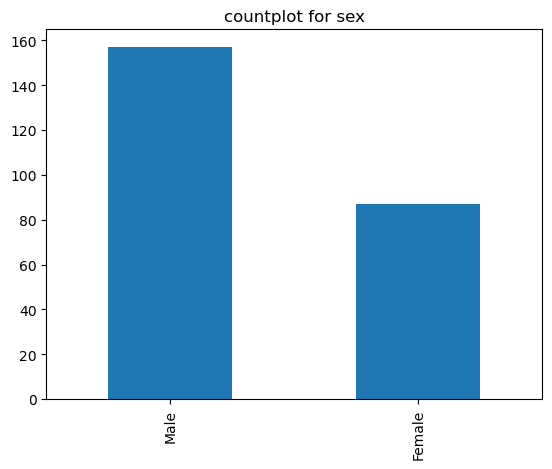

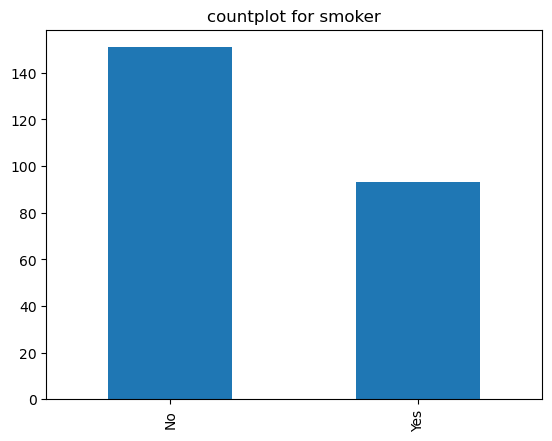

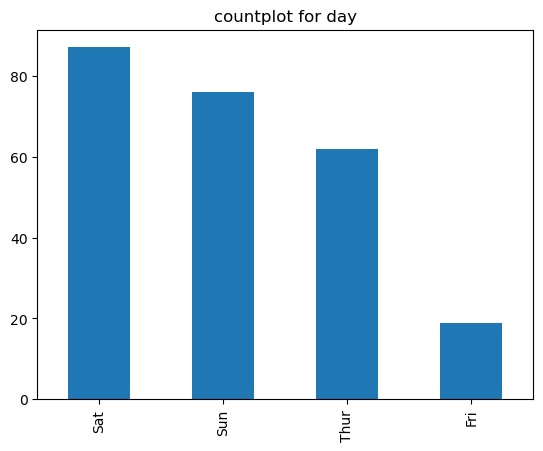

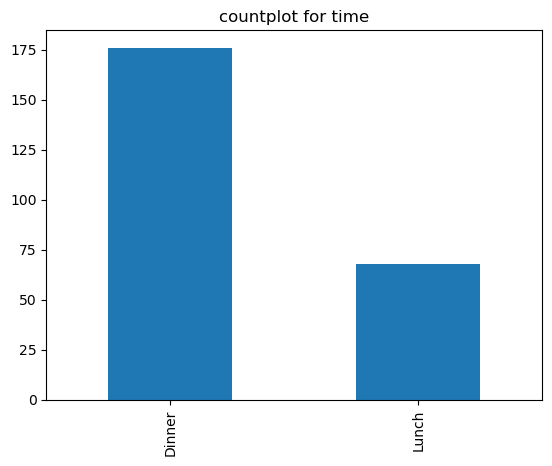

In [46]:
for I in cat:
    a[I].value_counts().plot(kind='bar',
                            title=f'countplot for {I}')
    plt.show()

### HISTOGRAM FOR CONTINOUS FEATURES

In [23]:
con

['total_bill', 'tip', 'size']

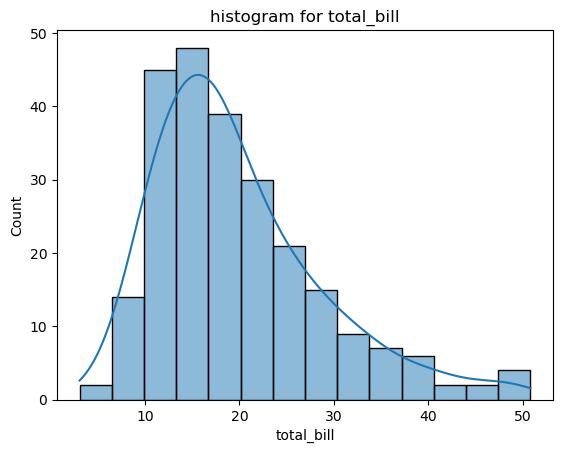

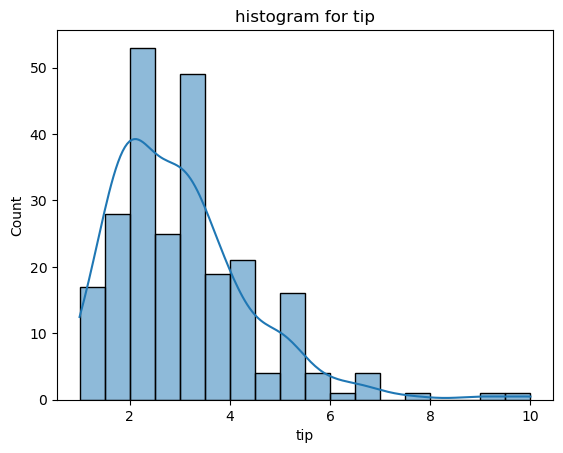

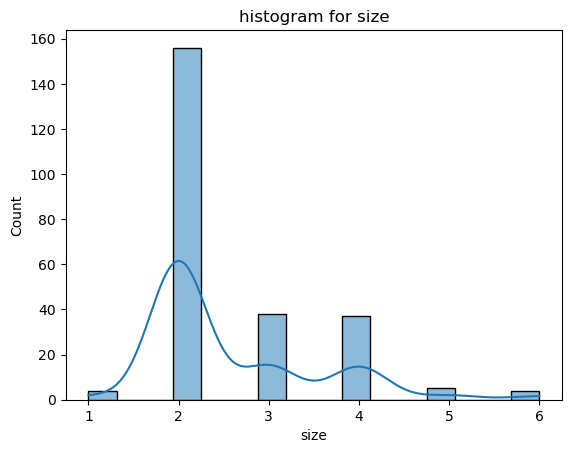

In [24]:
for i in con:
    sns.histplot(data=a , x=i, kde=True)
    plt.title(f'histogram for {i}')
    plt.show()

# BIVARIATE ANALYSIS

### SCATTERPLOT FOR CONTINOUS VS CONTINOUS FEATURES 

In [25]:
con

['total_bill', 'tip', 'size']

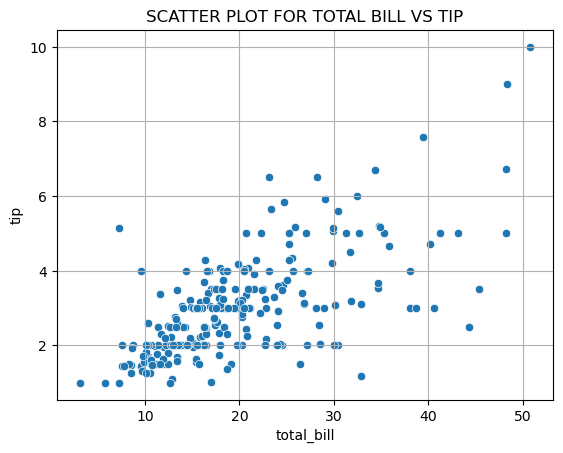

In [47]:
sns.scatterplot(data=a , x='total_bill', y='tip')
plt.title('SCATTER PLOT FOR TOTAL BILL VS TIP')
plt.grid()
plt.show()

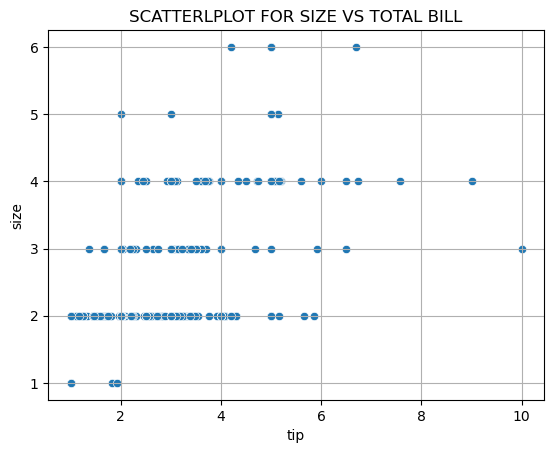

In [49]:
sns.scatterplot(data=a, x='tip', y='size')
plt.title(f'SCATTERLPLOT FOR SIZE VS TOTAL BILL')
plt.grid()
plt.show()

### CORRELATION HEATMAP FOR CONTINOUS VS CONTINOUS FEATURES

In [28]:
a[con].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


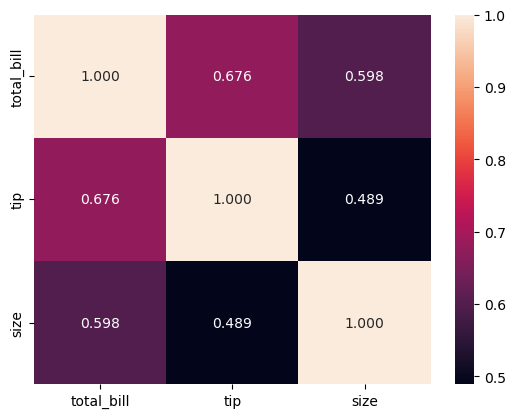

In [29]:
sns.heatmap(a[con].corr(),annot=True, fmt='.3f')
plt.show()

### BOXPLOT FOR CATEGORICAL VS CONTINOUS FEATURES

In [30]:
con

['total_bill', 'tip', 'size']

In [31]:
cat

['sex', 'smoker', 'day', 'time']

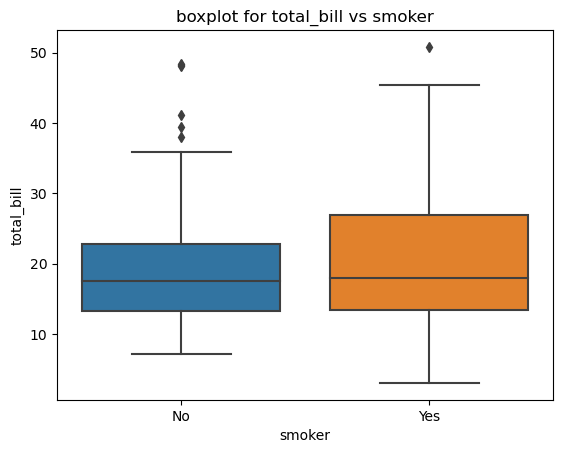

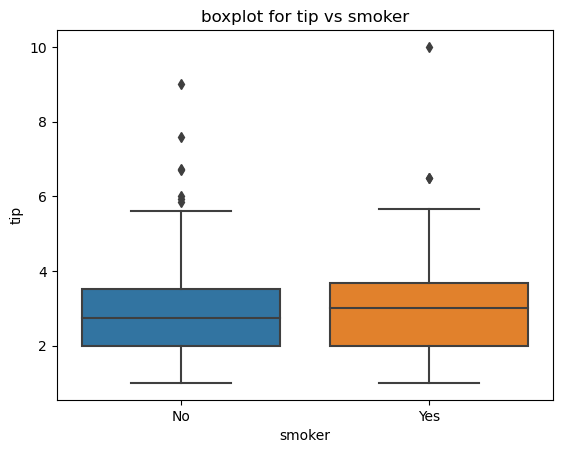

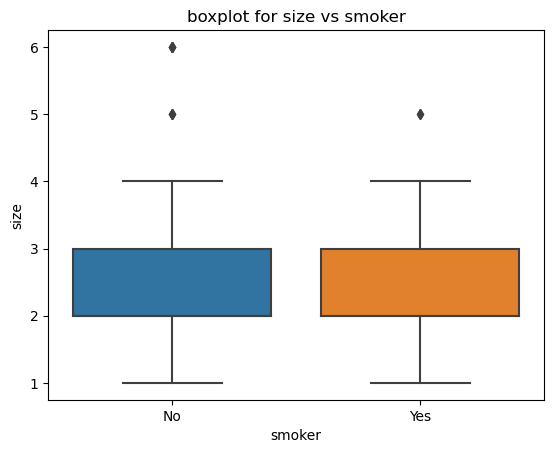

In [54]:
for i in con:
    sns.boxplot(data=a, x='smoker', y =i)
    plt.title(f'boxplot for {i} vs smoker')
    plt.show()

categorical feature : sex vs con


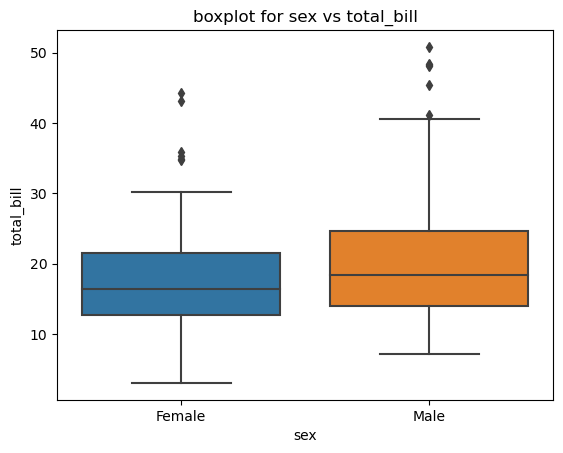

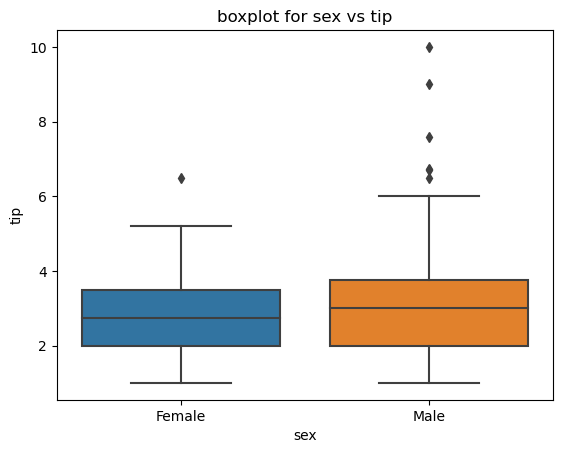

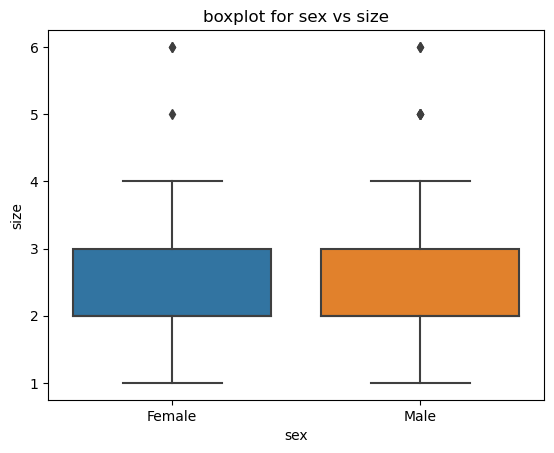



categorical feature : smoker vs con


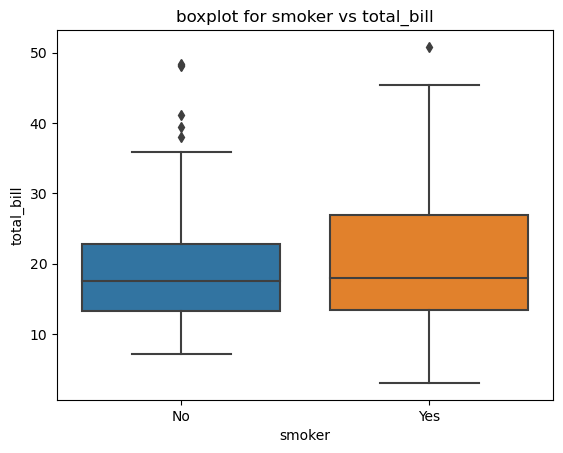

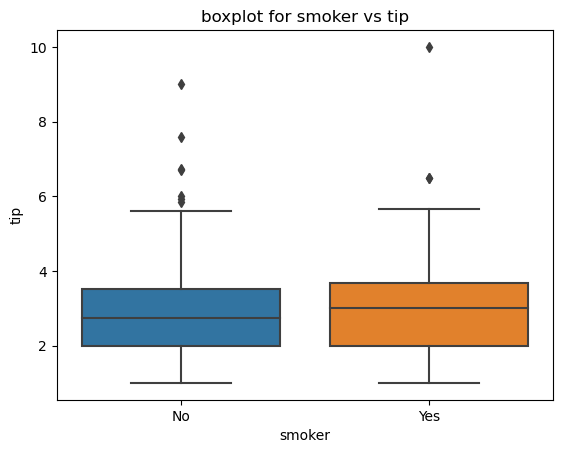

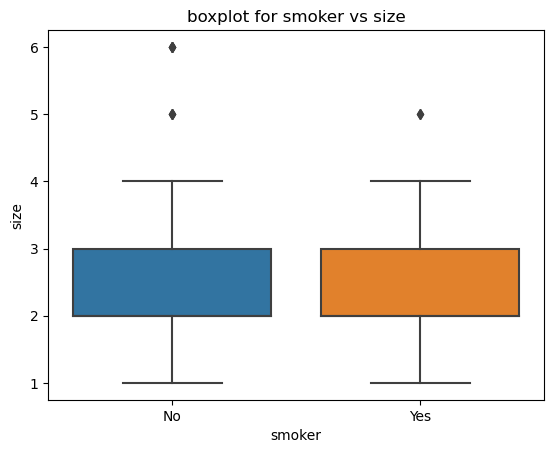



categorical feature : day vs con


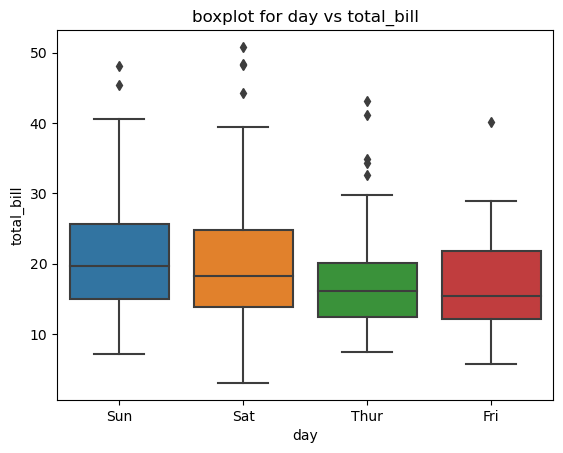

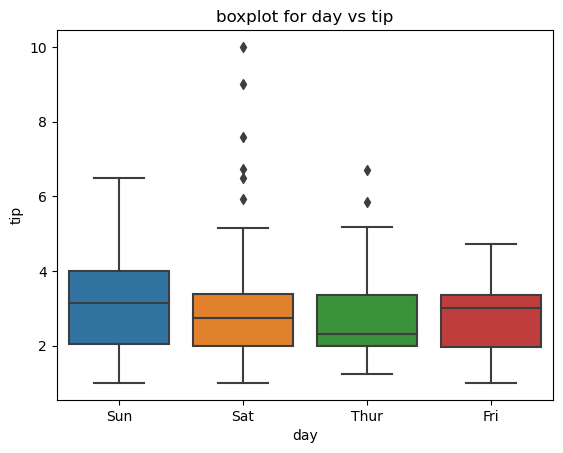

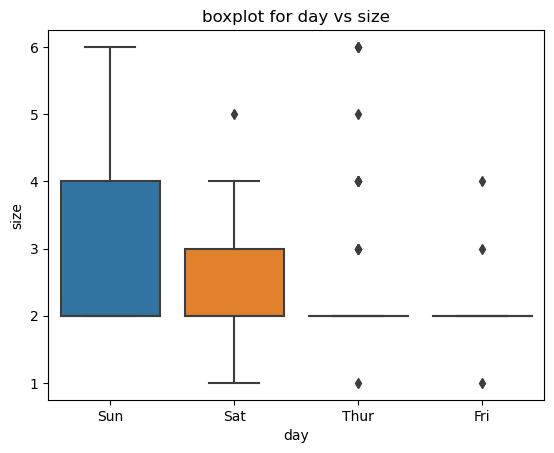



categorical feature : time vs con


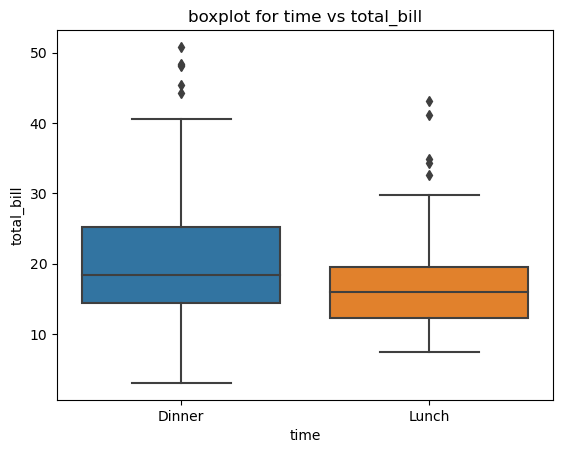

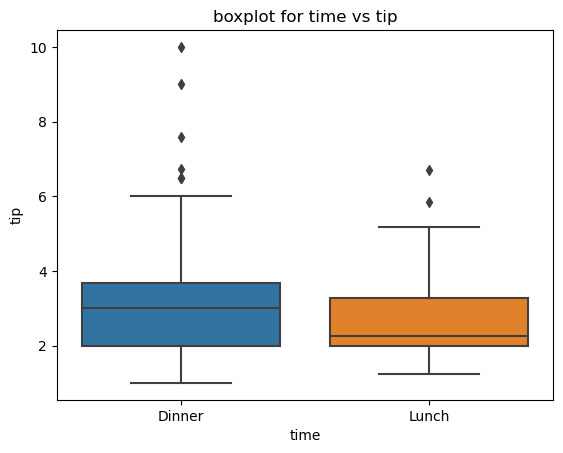

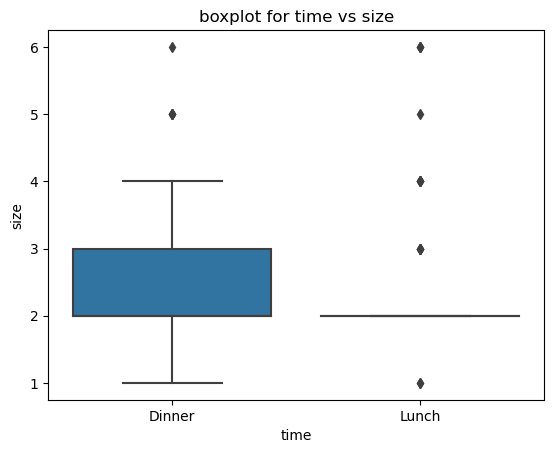

In [57]:
for i in cat:
    print(f'categorical feature : {i} vs con')
    for j in con:
        sns.boxplot(data=a , x=i, y=j)
        plt.title(f'boxplot for {i} vs {j}')
        plt.show()
    print('\n====================================================\n')

### CROSSTAB FOR CATEGORICAL VS CATEGORICAL FEATURES

In [60]:
cat

['sex', 'smoker', 'day', 'time']

In [63]:
ctab1 = pd.crosstab(a['day'], a['time'])
ctab1

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


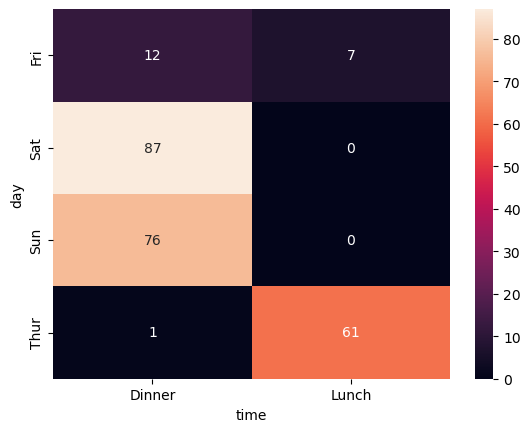

In [64]:
sns.heatmap(ctab1, annot=True, fmt='d')
plt.show()

### GETTING DIFFERENT COMBINATION OF CAT VS CAT

In [39]:
import itertools
comb =list(itertools.combinations(cat1+cat2, 2))

In [40]:
comb

[('sex', 'smoker'),
 ('sex', 'day'),
 ('sex', 'time'),
 ('sex', 'sex'),
 ('sex', 'smoker'),
 ('sex', 'day'),
 ('sex', 'time'),
 ('smoker', 'day'),
 ('smoker', 'time'),
 ('smoker', 'sex'),
 ('smoker', 'smoker'),
 ('smoker', 'day'),
 ('smoker', 'time'),
 ('day', 'time'),
 ('day', 'sex'),
 ('day', 'smoker'),
 ('day', 'day'),
 ('day', 'time'),
 ('time', 'sex'),
 ('time', 'smoker'),
 ('time', 'day'),
 ('time', 'time'),
 ('sex', 'smoker'),
 ('sex', 'day'),
 ('sex', 'time'),
 ('smoker', 'day'),
 ('smoker', 'time'),
 ('day', 'time')]

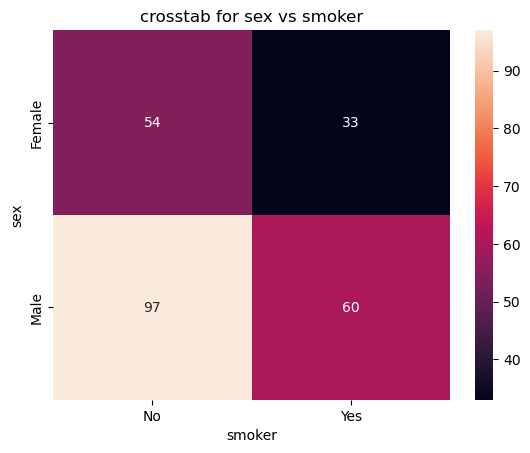

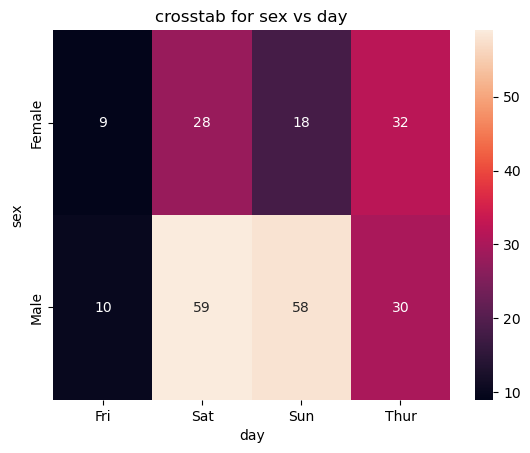

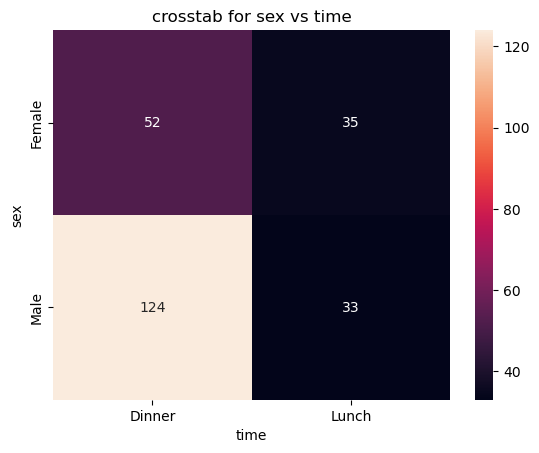

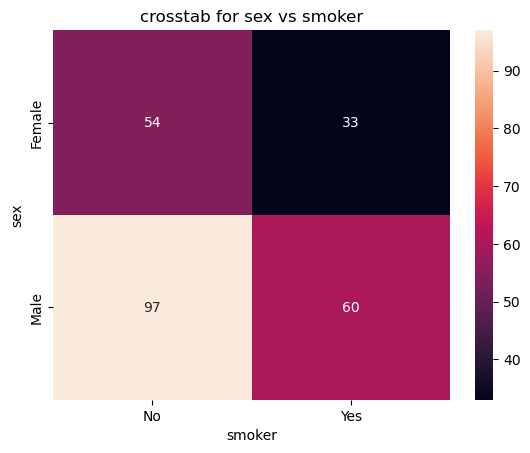

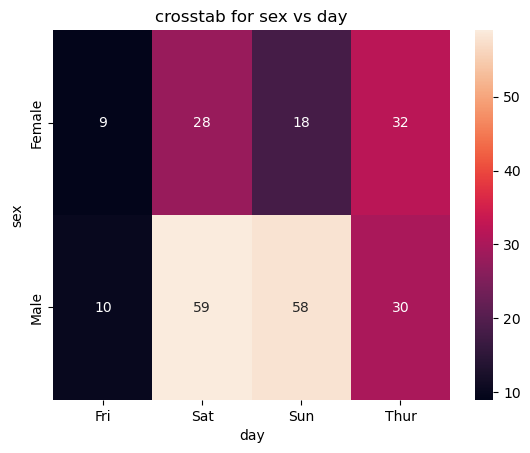

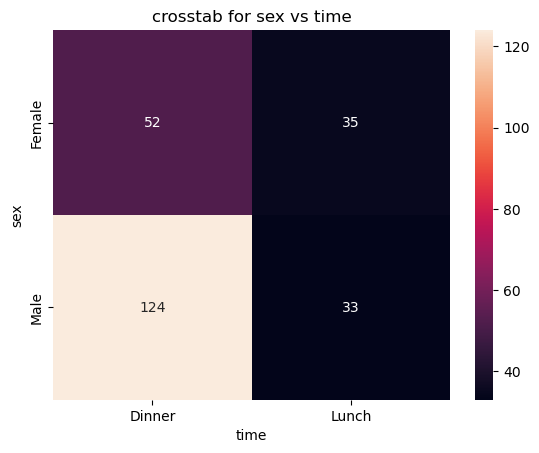

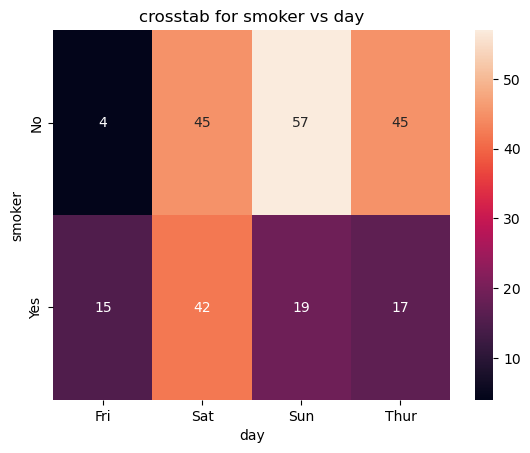

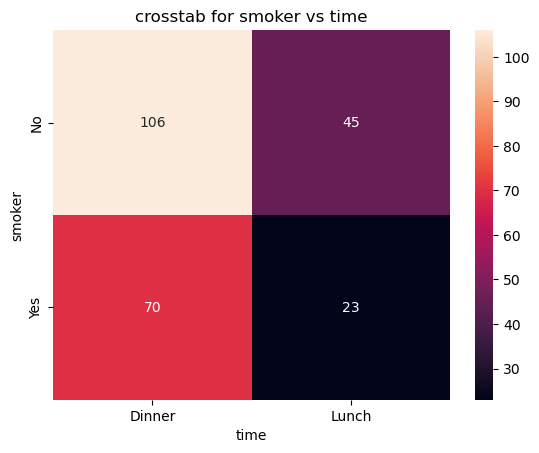

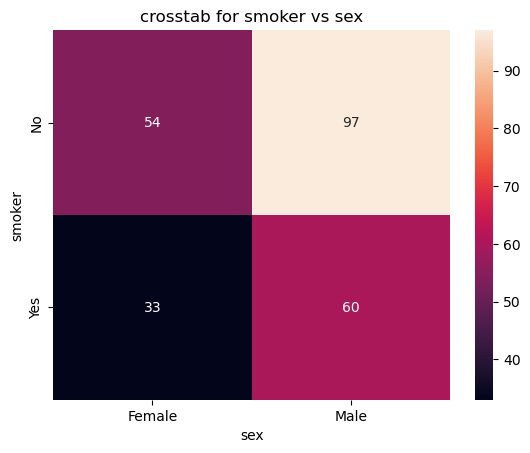

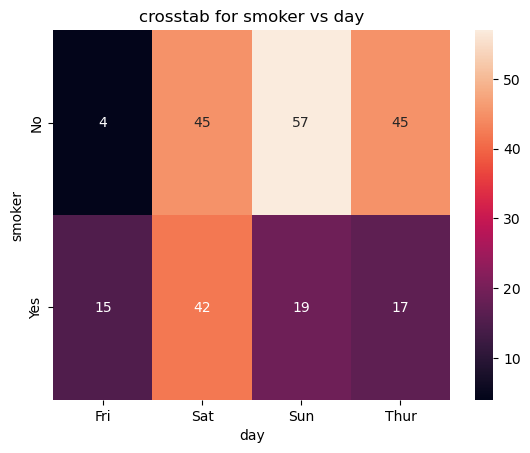

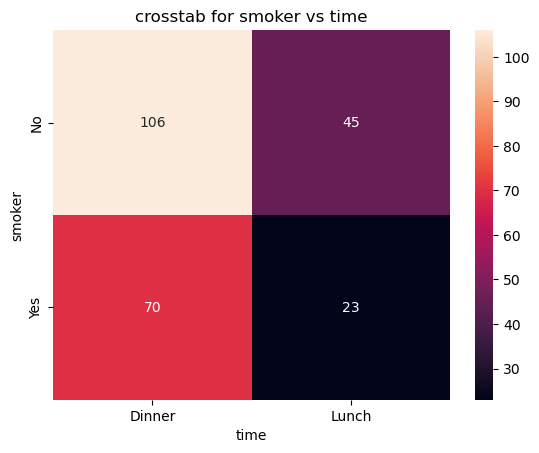

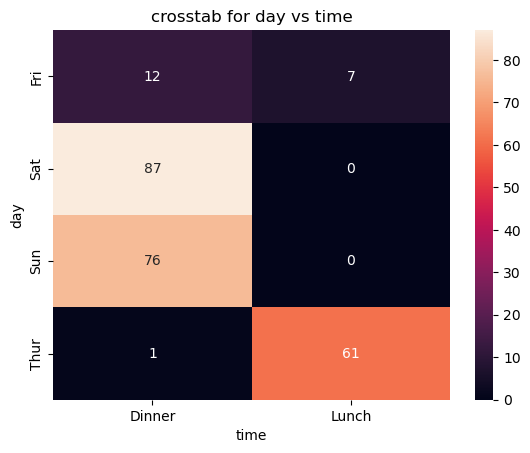

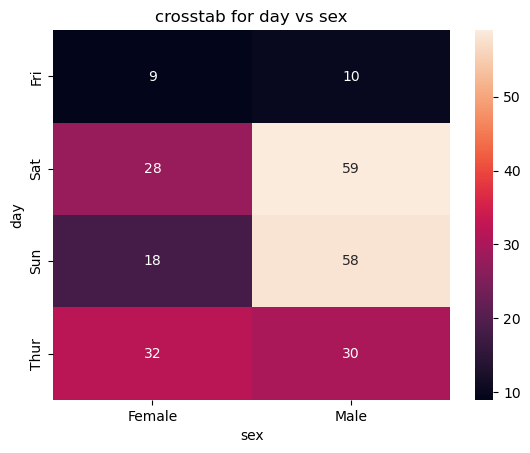

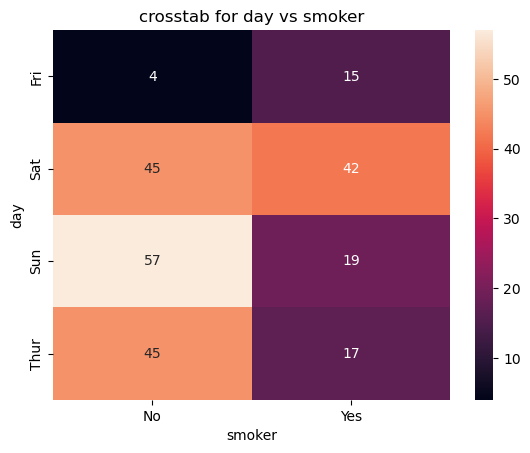

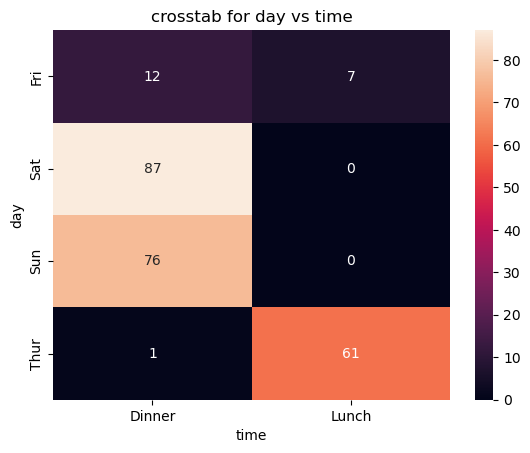

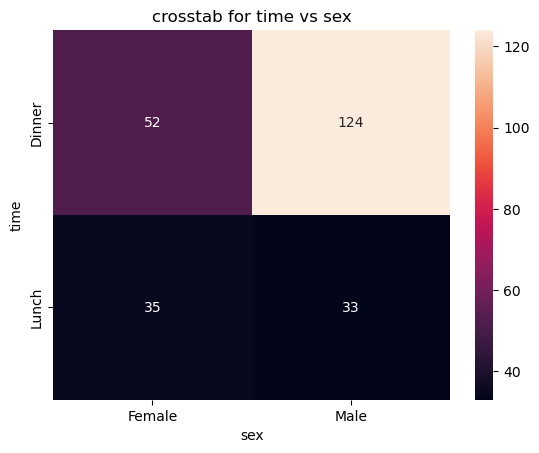

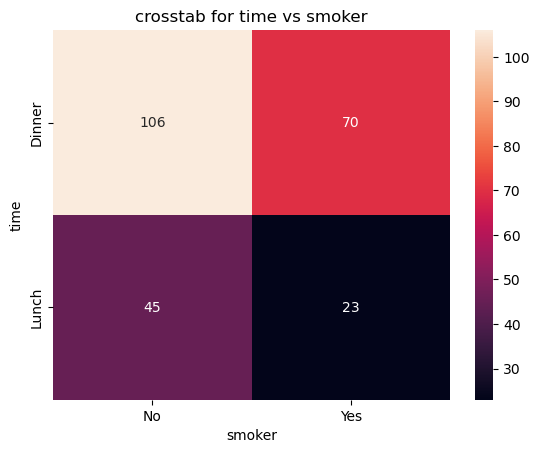

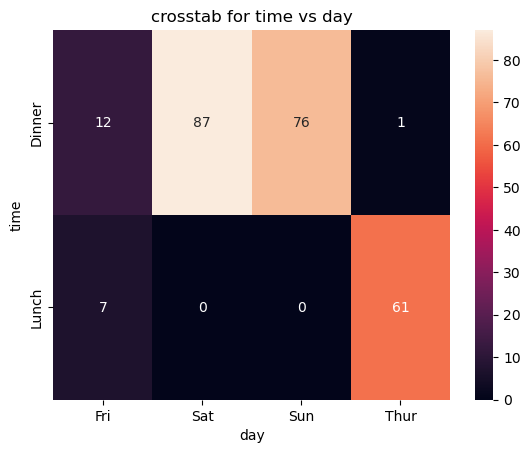

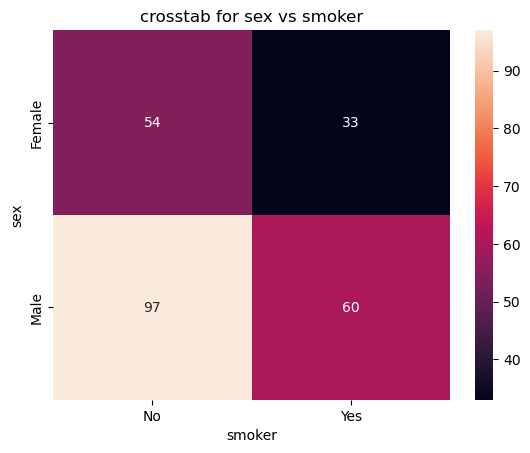

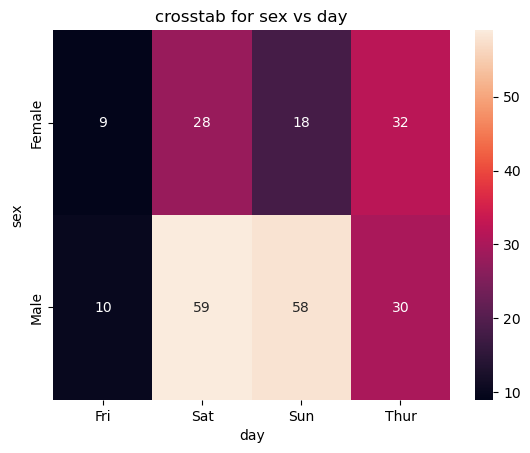

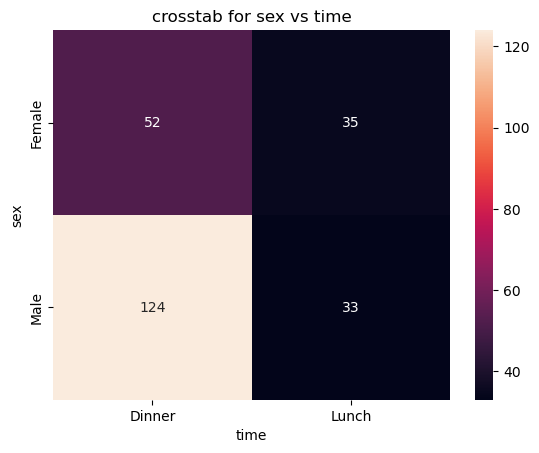

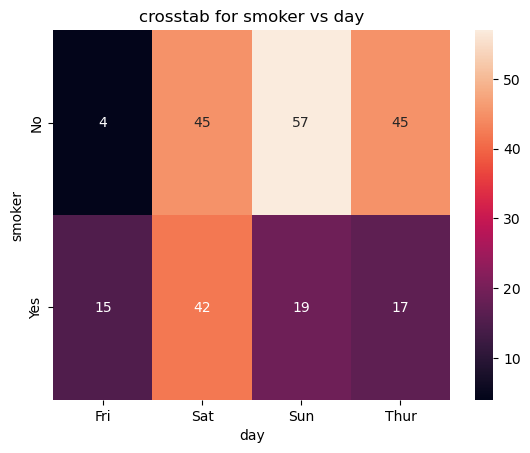

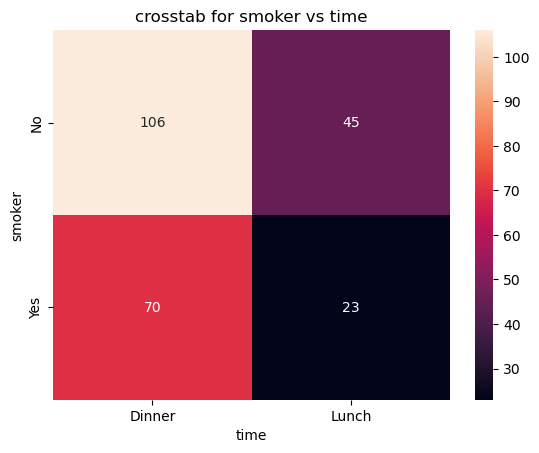

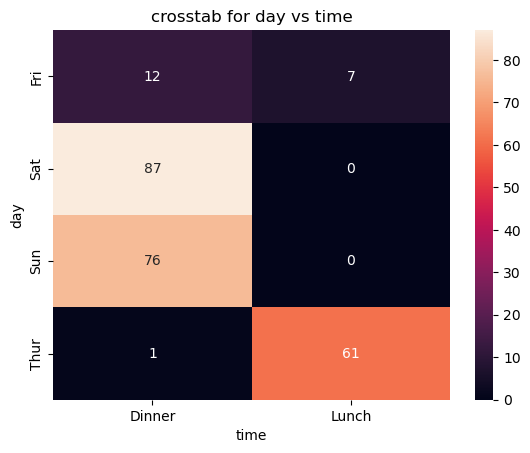

In [65]:
for i , j in comb:
    if i!=j:
        ctab=pd.crosstab(a[i], a[j])
        sns.heatmap(ctab, annot=True, fmt='d')
        plt.title(f'crosstab for {i} vs {j}')
        plt.show()

# MULTIVARIATE ANALYSIS-PAIRPLOT

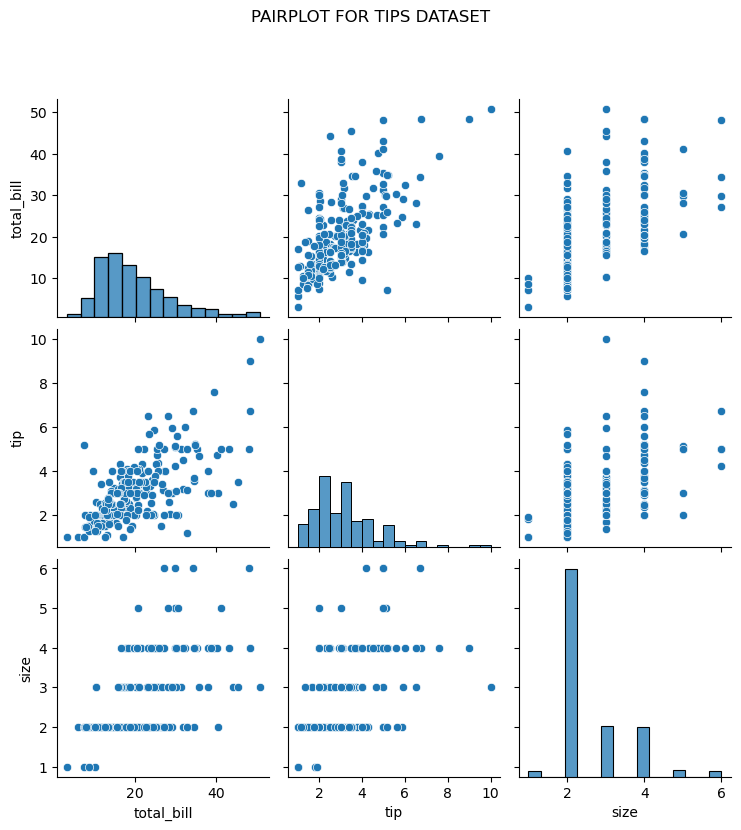

In [42]:
g=sns.pairplot(data=a)
g.fig.suptitle('PAIRPLOT FOR TIPS DATASET', y=1.1)
plt.show()

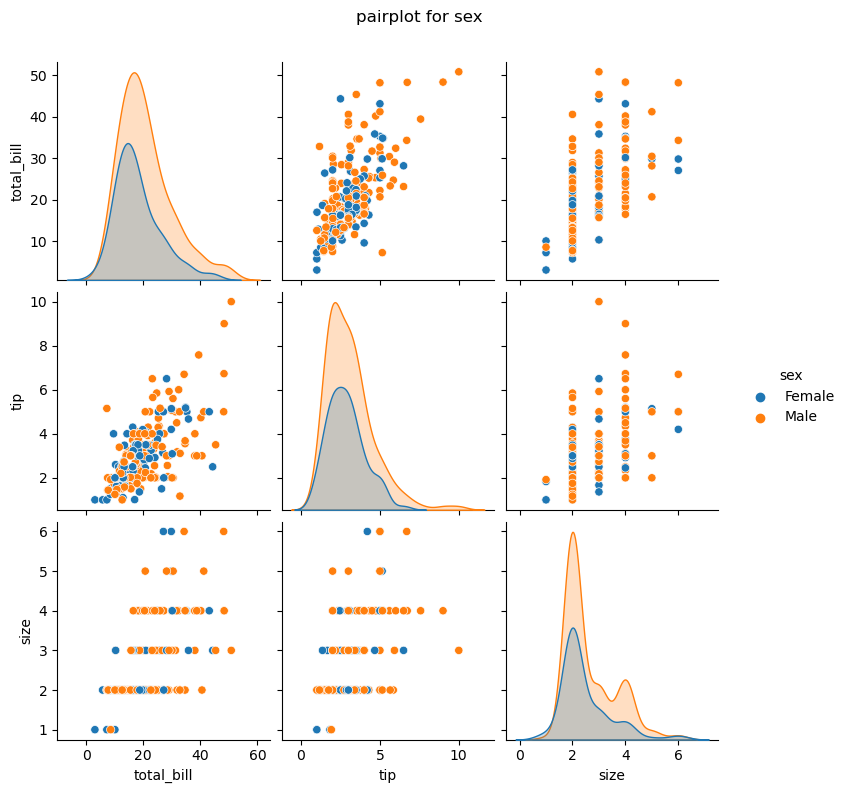

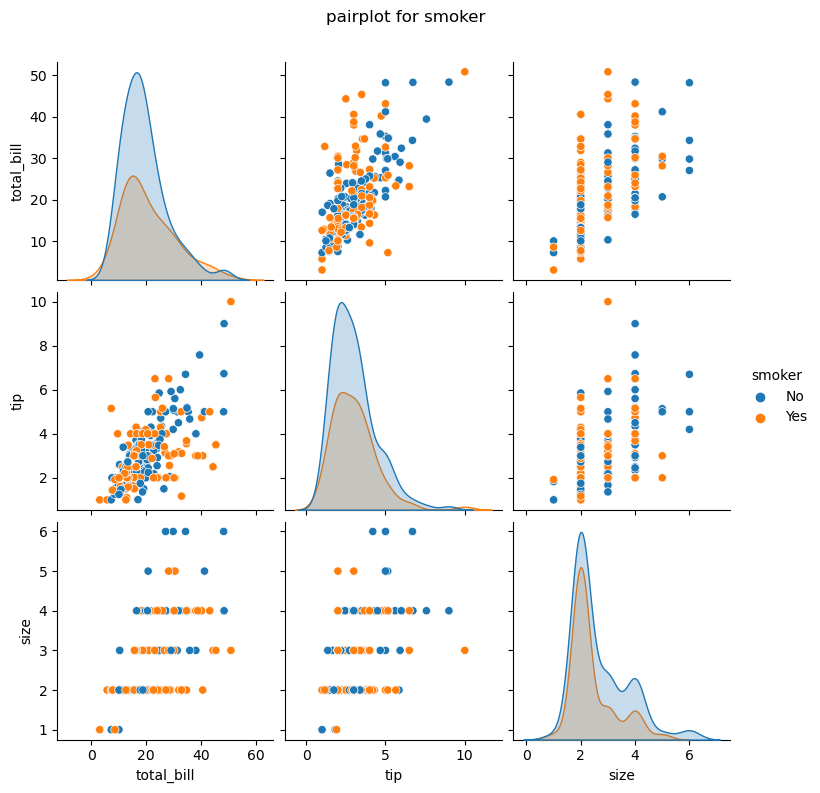

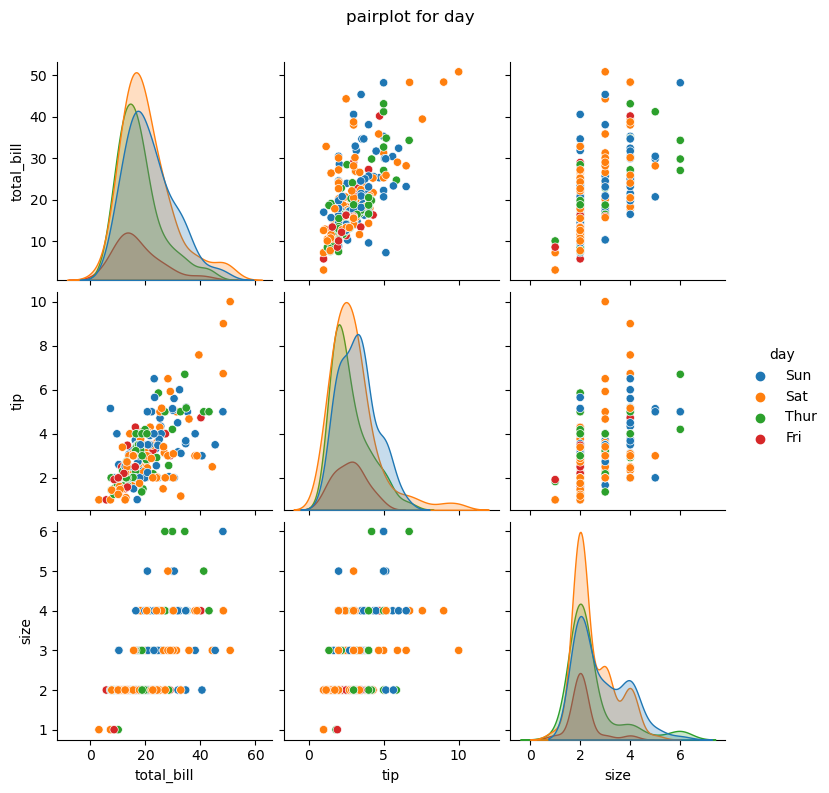

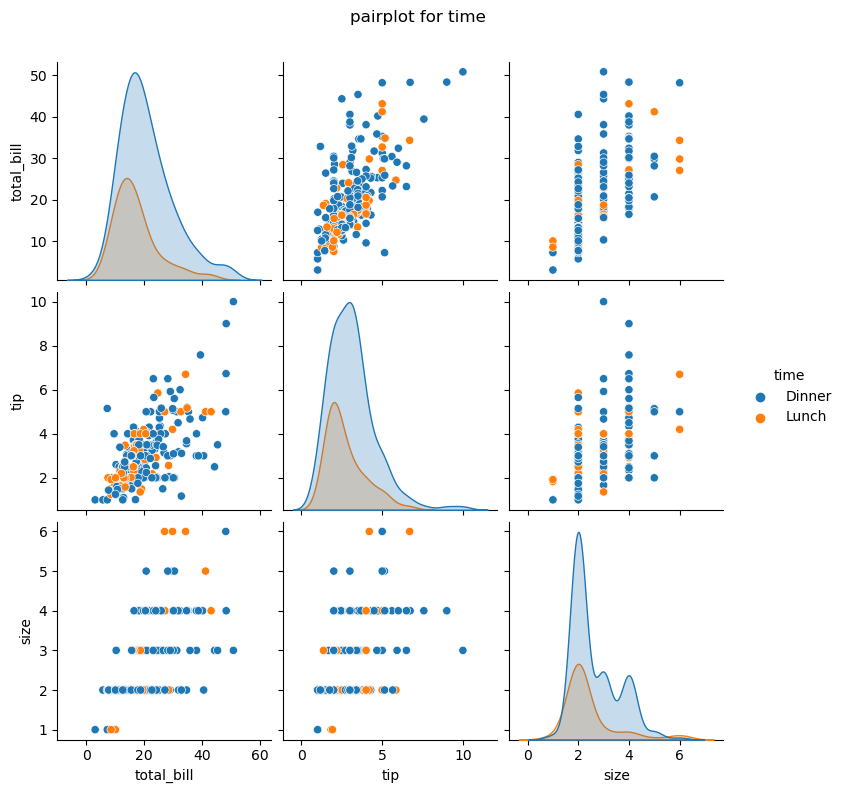

In [43]:
for i in cat :
    g=sns.pairplot(data=a, hue=i)
    g.fig.suptitle(f'pairplot for {i}', y=1.05)
    plt.show()